# Predicting currency exchange rate (Nigerian Naira vs British Pounds) using  ARIMA


We've cleaned the dataset from the Central Bank of Nigeria.

We can use make some predictions using machine learning models. 

In this notebook, we'll start with ARIMA.

# What is ARIMA

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

It is a forecasting algorithm based on information in the past values of the time series and used to predict future values.

ARIMA models consider the lags and lagged forecast errors in a timeseries. 

# Let's import the relevant libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

plt.style.use(style="seaborn")

#sns.set_theme(style="ticks")
#from pmdarima.arima.utils import ndiffs

# Let's import the cleaned data 

In [2]:
df = pd.read_csv("cleaned_data_GBP_to_NGN_2001-2020.csv", index_col="rate_date", parse_dates=True)
#df = pd.read_csv("cleaned_data_GBP_to_NGN_2001-2020.csv", parse_dates=True)

Setting "parse_dates" to "True" ensures pandas understands that we are dealing with date values

In [3]:
df.head()

,currency,rate_year,rate_month,buying_rate
rate_date,,,,
2001-12-10,POUNDS STERLING,2001,December,160.0238
2001-12-11,POUNDS STERLING,2001,December,160.1580
2001-12-12,POUNDS STERLING,2001,December,161.1759
2001-12-13,POUNDS STERLING,2001,December,161.7015
2001-12-14,POUNDS STERLING,2001,December,162.5786


In [4]:
df.drop(labels=["currency","rate_year", "rate_month"], axis=1, inplace=True) #we'll drop columns we dont need

# Let's visualise our data 

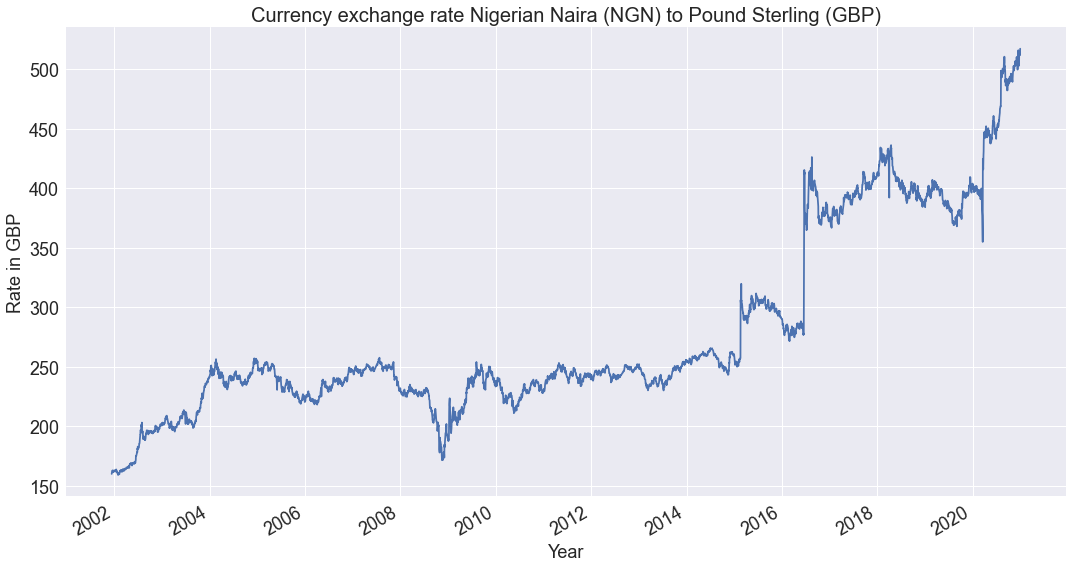

In [5]:
df["buying_rate"].plot(figsize=(15,8))

plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP)", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.tick_params(labelsize=18) 
plt.tight_layout()

#plt.legend(loc="best", fontsize=18)
#plt.xticks(ticks=year, rotation = 45)
#plt.xlim(2001,2020)

# Let's check for stationarity via Augmented Dickey Fuller (ADF) test 


This is because we need the data to be stationary (i.e. constant mean, constant variance) to apply the time series model.

Although, it is evident that the plot above is not stationary, nevertheless, we'll carry out the ADF test.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the p level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05, we'll need to find the order of differencing.

In [6]:
from statsmodels.tsa.stattools import adfuller 

#To carry out the stationary test

In [7]:
def adf_test(dataset):
  """
  checks for stationarity in a dataset using the Augmented Dickey–Fuller test (ADF)
  
  """  
     
  dftest = adfuller(dataset, autolag = "AIC")
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [8]:
adf_test(df["buying_rate"])

1. ADF :  0.646556064702757
2. P-Value :  0.9887086747049649
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4650
5. Critical Values :
	 1% :  -3.431757078186258
	 5% :  -2.8621617661052494
	 10% :  -2.56710096862065


if p< 0.05 ; Data is stationary 

if p>0.05; Data is not stationary

# Let's Get the three values (p,d,q) needed for the ARIMA model

ARIMA is composed of 3 terms(Auto-Regression(AR) + Integrated(I) + Moving Average(MA))

So our main job is to decide the order of the AR, I, MA parts which are depicted by(p,d,q) respectively


- p is the order of the AR term. It refers to the number of lags to be used as predictors.
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.



Auto-Regression(AR) means that it uses the previous values of the time series to predict future values. 

Integrated(I) is equivalent to the number of differencing steps to make the plot stationary.
We simply subtract it from previous values, until it becomes stationary
If you are differencing with just the previous value, it's order 1 and so on. We might need to do it multiple times.

Moving Average (MA)- This entails using previous errors to make the future predictions.

In [9]:
from pmdarima import auto_arima #for simplicity, Auto_Arima does this task for us.
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(df["buying_rate"], trace=True,
                          suppress_warnings=True) 

#Trace being True prints out every test(i.e. combination) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23903.720, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23941.571, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23933.986, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23933.899, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23942.323, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23919.456, Time=3.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23932.247, Time=3.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23898.747, Time=9.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23926.232, Time=3.06 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23864.099, Time=5.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23869.498, Time=2.94 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=23860.304, Time=8.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=23859.260, Time=4.78 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=23861.307, Time=1.19 sec
 ARIMA(4,1,0)(0,0,0

For each combination, an AIC score is assigned; we need the lowest AIC score for our calculation.

The Akaike Information Criterion (AIC) is a widely used measure of a statistical model. 
It basically quantifies the goodness of fit and the simplicity of the model.
AIC penalizes complex models in favour of simple ones

Akaike information criterion (AIC) is a mathematical method... 
for evaluating how well a model fits the data it was generated from. 
The aim is to get the minimum AIC.

The best p,d,q values are chosen based on the minimum AIC score

In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4662
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -11921.630
Date:                Wed, 22 Sep 2021   AIC                          23859.260
Time:                        08:06:48   BIC                          23910.836
Sample:                             0   HQIC                         23877.401
                               - 4662                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1221      0.088      1.391      0.164      -0.050       0.294
ar.L1         -0.3919      0.131     -2.986      0.003      -0.649      -0.135
ar.L2         -0.0187      0.014     -1.313      0.189      -0.047       0.009
ar.L3          0.0214      0.010      2.069      0.039       0.001       0.042
ar.L4         -0.1023      0.006    -17.156      0.000      -0.114      -0.091
ar.L5         -0.1075      0.014     -7.635      0.000      -0.135      -0.080
ma.L1          0.3439      0.132      2.611      0.009       0.086       0.602
sigma2         9.7531      0.017    579.615      0.000       9.720       9.786
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          88578318.05
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              11.31   Skew:                            17.92
Prob(H) (two-sided):                  0.00   Kurtosis:                       677.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Let's split the dataset into the training and testing groups

In [12]:
df.shape

(4662, 1)

In [13]:
n = int(len(df) * 0.8) #training the model with 2001 - 2017 dataset

In [14]:
#train = df["buying_rate"][:n]
#test=df["buying_rate"][n:] 

In [15]:
train = df.iloc[:n]
test=df.iloc[n:] 

In [16]:
print (train.shape, test.shape)
print(train,test)

(3729, 1) (933, 1)
            buying_rate
rate_date              
2001-12-10     160.0238
2001-12-11     160.1580
2001-12-12     161.1759
2001-12-13     161.7015
2001-12-14     162.5786
...                 ...
2017-03-07     371.6731
2017-03-08     370.4543
2017-03-09     370.4539
2017-03-10     370.2710
2017-03-13     372.8930

[3729 rows x 1 columns]             buying_rate
rate_date              
2017-03-14     370.2683
2017-03-15     372.5878
2017-03-16     377.2344
2017-03-17     378.1854
2017-03-20     379.7229
...                 ...
2020-12-23     508.5422
2020-12-24     514.9852
2020-12-29     511.8395
2020-12-30     515.8948
2020-12-31     517.3350

[933 rows x 1 columns]


# Let's visualise the train and test set

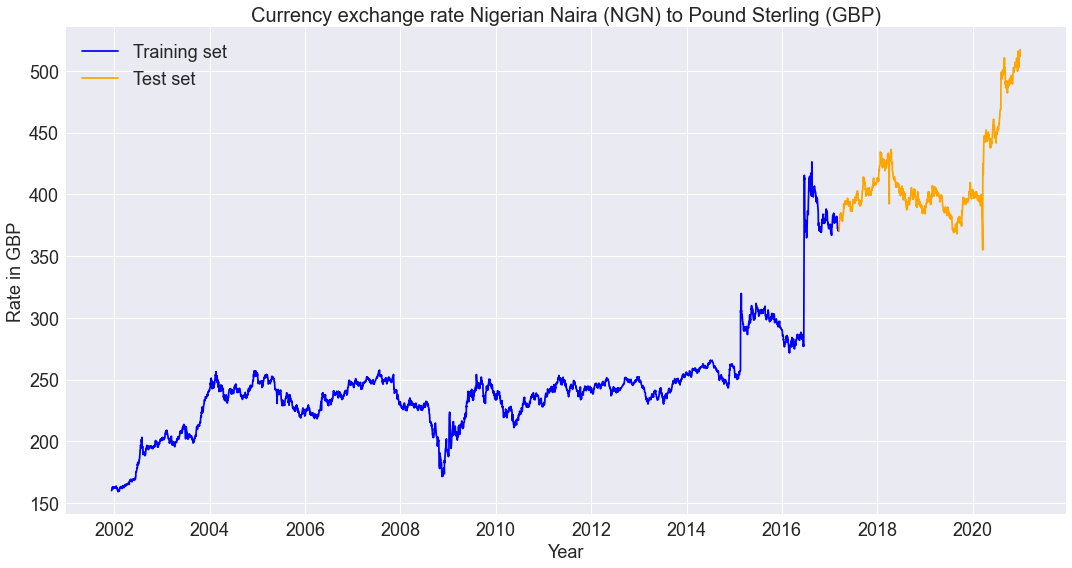

In [17]:
fig, ax = plt.subplots(figsize=(15,8))

plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP)", fontsize=20) 
plt.plot(train, label='Training set', color="blue")
plt.plot(test, label='Test set', color='orange')
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18);

# Let's fit the training data in the model 

In [18]:
from statsmodels.tsa.arima_model import ARIMA 

The order (5,1,1) correspond to the  p,d,q values obtained earlier

In [19]:
model=ARIMA(train,order=(5,1,1)) 

#for this ARIMA model (5,1,0), this sets:
# 5 for autoregression
# 1 is the difference order to make the time series stationary
# 0 is the moving average model

model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.buying_rate   No. Observations:                 3728
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9296.875
Method:                       css-mle   S.D. of innovations              2.930
Date:                Wed, 22 Sep 2021   AIC                          18609.749
Time:                        08:06:50   BIC                          18659.538
Sample:                             1   HQIC                         18627.461
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0570      0.041      1.405      0.160      -0.023       0.137
ar.L1.D.buying_rate    -0.3693      0.131     -2.821      0.005      -0.626      -0.113
ar.L2.D.buying_rate    -0.0014      0.017     -0.080      0.937      -0.035       0.032
ar.L3.D.buying_rate     0.0173      0.017      1.005      0.315      -0.016       0.051
ar.L4.D.buying_rate    -0.1299      0.017     -7.476      0.000      -0.164      -0.096
ar.L5.D.buying_rate    -0.1360      0.021     -6.498      0.000      -0.177      -0.095
ma.L1.D.buying_rate     0.3689      0.132      2.801      0.005       0.111       0.627
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1017           -0.9834j            1.4768           -0.1160
AR.2            1.1017           +0.9834j            1.4768            0.1160
AR.3           -0.7979           -1.2333j            1.4689           -0.3414
AR.4           -0.7979           +1.2333j            1.4689            0.3414
AR.5           -1.5622           -0.0000j            1.5622           -0.5000
MA.1           -2.7107           +0.0000j            2.7107            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
start=len(train) #where training set ends
end=len(train)+len(test)-1 

In [21]:
pred=model.predict(start=start,end=end, typ="levels", dynamic=True)

print(pred)
#pred.index=df.index[start:end+1]

#pred=model.predict(start="2021",end="2020", typ="levels"). 

#This allows us to specify the "index of the time" or the "time periods" to be predicted.

#These indexes are relative to the start of the training dataset used to make predictions.

3728    373.326940
3729    373.418058
3730    373.545203
3731    373.282294
3732    373.060056
           ...    
4656    425.827512
4657    425.884502
4658    425.941493
4659    425.998484
4660    426.055474
Length: 933, dtype: float64


Let's change the index to the dates to match the test dataset

In [22]:
pred_timeindex = pd.DataFrame(pred, columns=["Prediction"])

In [23]:
pred_timeindex = pred_timeindex.set_index(test.index)

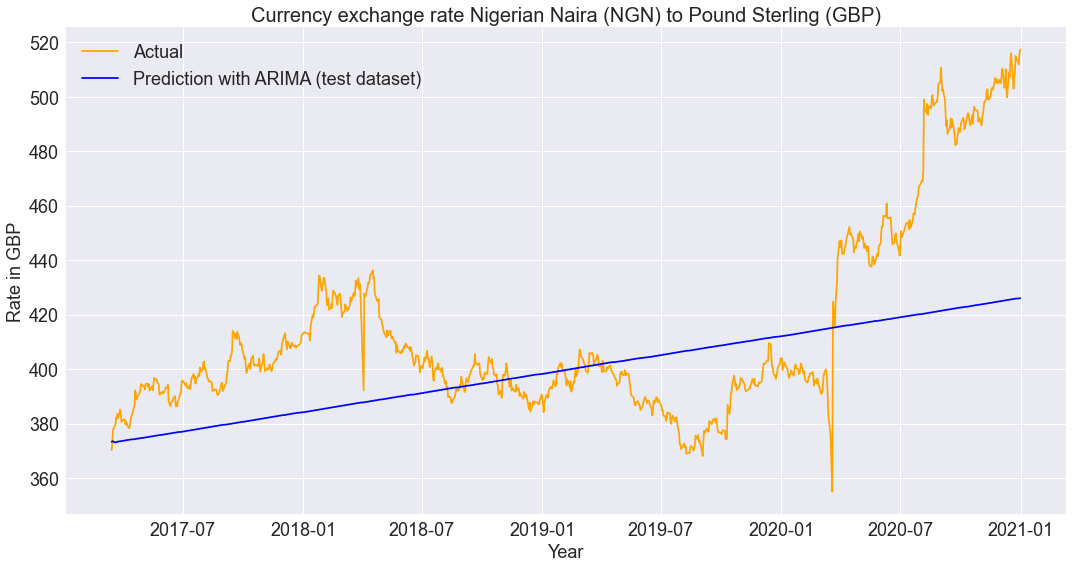

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP)", fontsize=20) 
plt.plot(test, label='Actual', color='orange')
plt.plot(pred_timeindex, label='Prediction with ARIMA (test dataset)', color="blue")
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18);

#plt.legend(loc="best", fontsize=18)
#plt.xticks(ticks=year, rotation = 45)
#plt.xlim(2001,2020)

# Let's include and visualise confidence limits on the predicted values

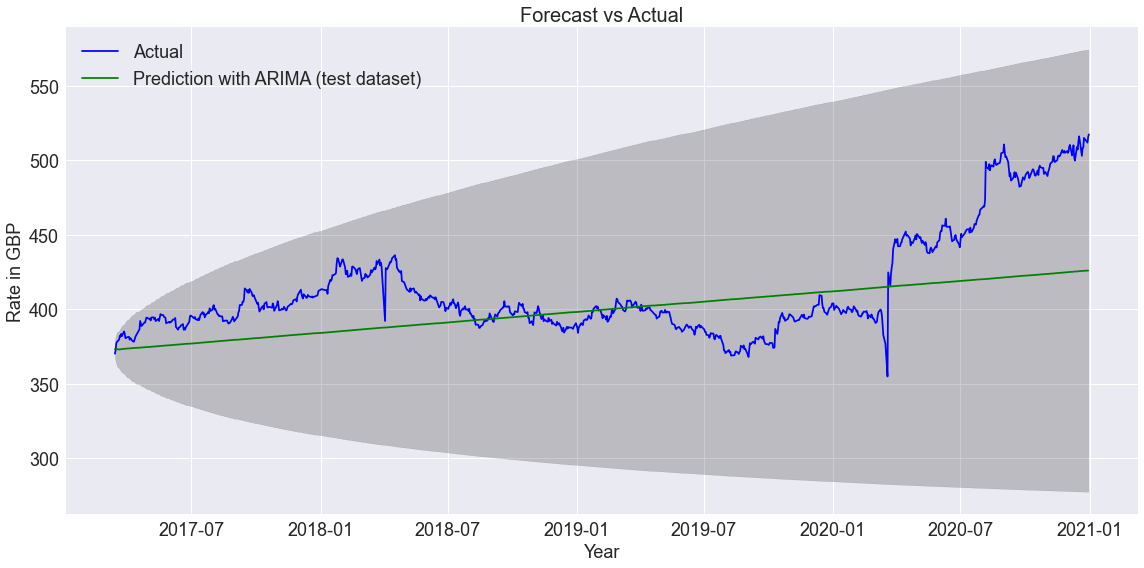

In [25]:
fc, se, conf = model.forecast(end-start) #forecast steps

fc = pd.Series(fc, index=test[:end-start].index)
lower = pd.Series(conf[:, 0], index=test[:end-start].index)
upper = pd.Series(conf[:, 1], index=test[:end-start].index)

plt.figure(figsize=(16, 8))
plt.plot(test, label="Actual", color="blue")

plt.plot(fc, label="Prediction with ARIMA (test dataset)", color="green")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.2)
plt.title("Forecast vs Actual", fontsize=20)
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="upper left", fontsize=18);


# Let's evaluate the accuracy of our model

This helps predict how good or bad our model is.

In [26]:
from sklearn.metrics import mean_squared_error #to evaluate our accuracy of the model
from math import sqrt

In [27]:
rmse = sqrt(mean_squared_error(pred_timeindex, test))
print(rmse)

32.65396384960992


Let's compare the RMSE to the mean of the dataset

In [28]:
test.mean()

buying_rate    413.852105
dtype: float64

In [29]:
round((rmse/test.mean() * 100), ndigits=0)

buying_rate    8.0
dtype: float64

The rmse should be very significantly smaller than the mean of the test set. 
this means that - On average, our predictions are off by about X. 

# Let's make predictions for the next five years

The indexes are relative to the start of the training dataset used to make predictions.

Since we have daily data and would like to make predictions for the next five years, we'll do:

365 * 5 = 1825

We'll add the above value to the "end" in the plot_predict method

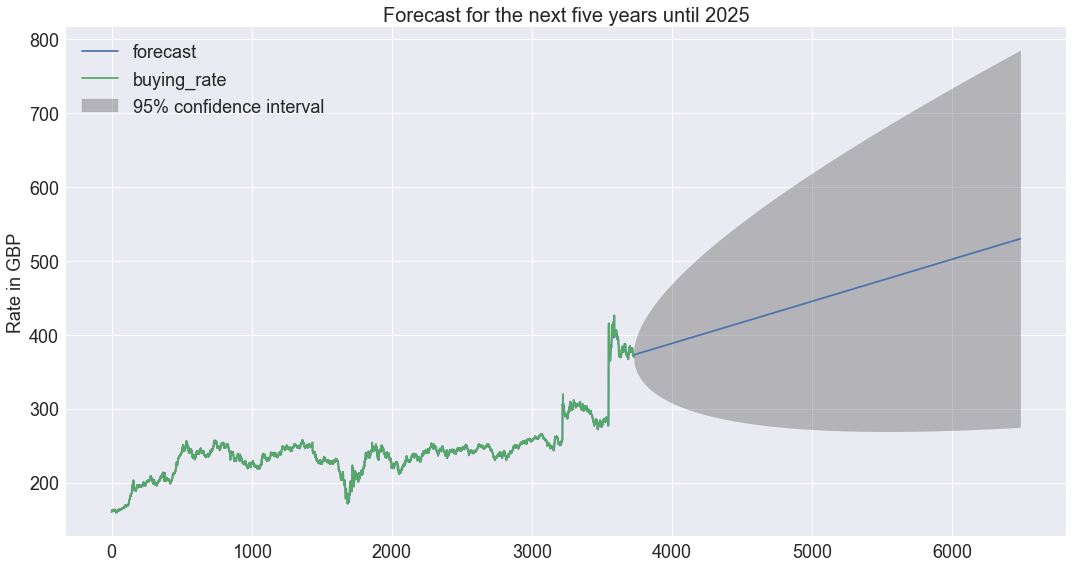

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
model.plot_predict(start=1,end=end+1825, ax=ax, plot_insample=True, alpha=0.05) 
#alpha represents confidence intervals, which is (1 - alpha)%

plt.title("Forecast for the next five years until 2025", fontsize=20)
plt.legend(loc="upper left")

plt.ylabel("Rate in GBP", fontsize=18)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="upper left", fontsize=18);


#df["buying_rate"].plot(ax=ax, figsize=(15,8))
#fig = model.plot_predict("2002","2017", ax=ax, plot_insample=False) 